<a href="https://colab.research.google.com/github/bannis14/Portfolio-Projects/blob/main/Time_Series_Forecast/Ensemble_Calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Model Evaluation



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble

/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble


## Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.concat(map(pd.read_csv, ['predictions_prophet.csv',
                                 'predictions_sarimax.csv',
                                 'predictions_silverkite.csv',
                                 'predictions_lstm.csv']),
                   axis=1)

df = df[['ds', 'prophet', 'sarimax', 'silverkite', 'lstm']]
df.index = df.pop('ds')


In [ ]:
df.head()

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,724.480101,739.874432,750.518503,716.401502
2021-01-02,836.016157,856.312084,833.825895,875.108866
2021-01-03,754.639245,767.567530,752.872797,777.071181
2021-01-04,880.935735,907.626374,896.849763,919.030032
2021-01-05,750.931655,779.803536,779.597889,781.219549


## Ensemble

In [ ]:
# getting the error
path = "/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/"

error_prophet = float(pd.read_csv(F"{path}best_params_prophet.csv").iloc[4, 1])
error_sarimax = pd.read_csv(F"{path}best_params_sarimax.csv").iloc[6, 1]
error_silverkite = float(pd.read_csv(F"{path}best_params_silverkite.csv").iloc[0, 1])
error_lstm = float(pd.read_csv(F"{path}best_params_lstm.csv").iloc[7, 1])

In [ ]:
# Average Errors
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm) / 4
print(f"The average error is {average_error}")

The average error is 66.08579958654582


In [ ]:
# Initial Weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

The Prophet weight is 0.344123830226879


In [ ]:
weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The Sarimax weight is {weight_sarimax}")

The Sarimax weight is 0.2755632016163322


In [ ]:
weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

The Silverkite weight is 0.34636163305317513


In [ ]:
weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")

The LSTM weight is 0.152022308562768


In [ ]:
# Extra_weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding the weights equals to {extra_weight}")

Adding the weights equals to 1.1180709734591543


## Ensemble Forecast

In [ ]:
# Ensemble
df['ensemble'] = (df.prophet * weight_prophet +
                  df.sarimax * weight_sarimax +
                  df.silverkite * weight_silverkite +
                  df.lstm * weight_lstm) / extra_weight

In [ ]:
df.head()

,prophet,sarimax,silverkite,lstm,ensemble
ds,,,,,
2021-01-01,724.480101,739.874432,750.518503,716.401502,735.242108
2021-01-02,836.016157,856.312084,833.825895,875.108866,845.655216
2021-01-03,754.639245,767.567530,752.872797,777.071181,760.328405
2021-01-04,880.935735,907.626374,896.849763,919.030032,897.623539
2021-01-05,750.931655,779.803536,779.597889,781.219549,771.046073


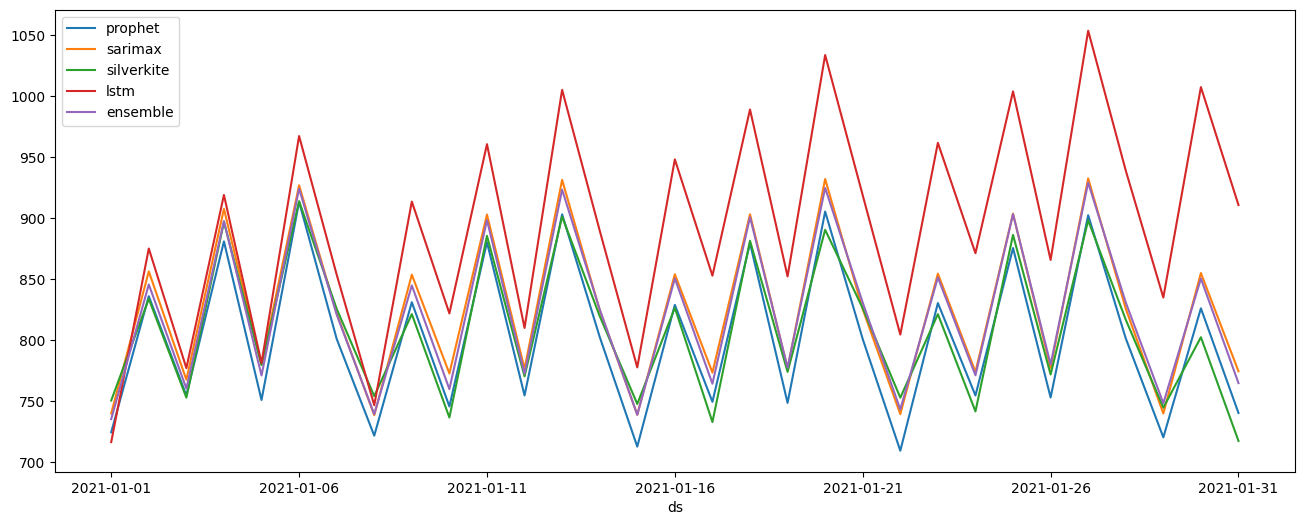

In [ ]:
df.plot(figsize=(16, 6), legend=True)

#plt.xticks(rotation = 'vertical')

plt.show()